# Calories Burnt Prediction using Machine Learning

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore") 

In [41]:
exercise = pd.read_csv(r"C:\Users\dinesh\Downloads\exercise.csv")

### General Overview of Dataset

In [42]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [43]:
calories= pd.read_csv(r"C:\Users\dinesh\Downloads\calories.csv")

In [44]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [45]:
calories_df = exercise.merge(calories , on = "User_ID")
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [46]:
calories_df.shape

(15000, 9)

In [47]:
print("This dataset has " , calories_df.shape[0] ," instances and ",  calories_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


In [48]:
print("Columns : ")
for i , column in zip(range(len(calories_df.columns)) , calories_df.columns):
  print("\t" , i + 1 , "." ,  column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


1.**User_ID** : The ID of the person which is unique.\
2.**Gender** : Gender of the person.\
3.**Age** : Age of the person.\
4.**Height** : Height of the person in $cm$.\
5.**Weight** : Weight of the person in $kg$.\
6.**Duration** : Duration of the person's exercise/activity.\
7.**Heart_Rate** : Heart rate per $min$ of the person.\
8.**Body_Temp** : Body temperature of the person in $C^{\circ}$.\
9.**Calories** : Calories burned in kilo calories.

### Dataset's Overall Statistic

In [49]:
calories_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


--Age Distribution: The dataset covers individuals ranging from 20 to 79 years old, with a mean age of around 42.79 years. This indicates a relatively broad age range in the dataset.

--Physical Attributes: The dataset includes information about individuals' height and weight, which can be useful for analyzing body mass index (BMI) or other physical health metrics.

--Activity Metrics: Metrics such as duration, heart rate, and body temperature suggest that the dataset likely involves physical activities or exercises where these metrics were measured.

--Caloric Expenditure: The calories burned during the activity sessions vary widely, with a mean of around 89.54 calories and a standard deviation of approximately 62.46 calories. This indicates that the calorie expenditure during the activities can differ significantly among individuals in the dataset.

### Overall information of dataset

In [50]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
User_ID       15000 non-null int64
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


### Null values
In this section we are going to check whether this dataset has null values or not.We will check this with heatmap.Because it is easy to understand and we can see dataset's condition at a glance. 

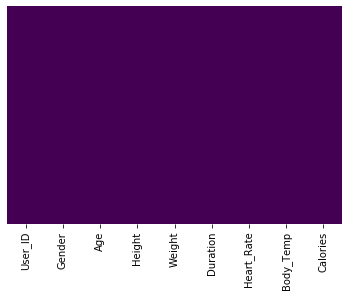

In [51]:
sns.heatmap(calories_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

* As we can see, fortunately, this dataset does not have any null/NaN values, which is good and it is not necessary to do extra manipulations(for instance imputation , dropping or filling NaN values etc.) with this dataset.

### Drop Duplicates
Lets assure that this dataset does not contain any duplicate values in `User_ID` column.

In [52]:
print("The shape of dataset before dropping duplicates : " , calories_df.shape)
calories_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    # Keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates : " , calories_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


* As we can see the shape of dataset before and after dropping duplicates is the same.It is a good sign, because we do not need to be worry about `Data Leakage`.

* In the next step we have to delete `User_ID` feature.Because it is a `low predictive feature`.In other words, it is not only a useless feature for our calorie burned prediction model but also has a negative impact on model's accuracy.

In [53]:
calories_df.drop(columns = "User_ID" , inplace = True)

### Data's Distribution

In [54]:
calories_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


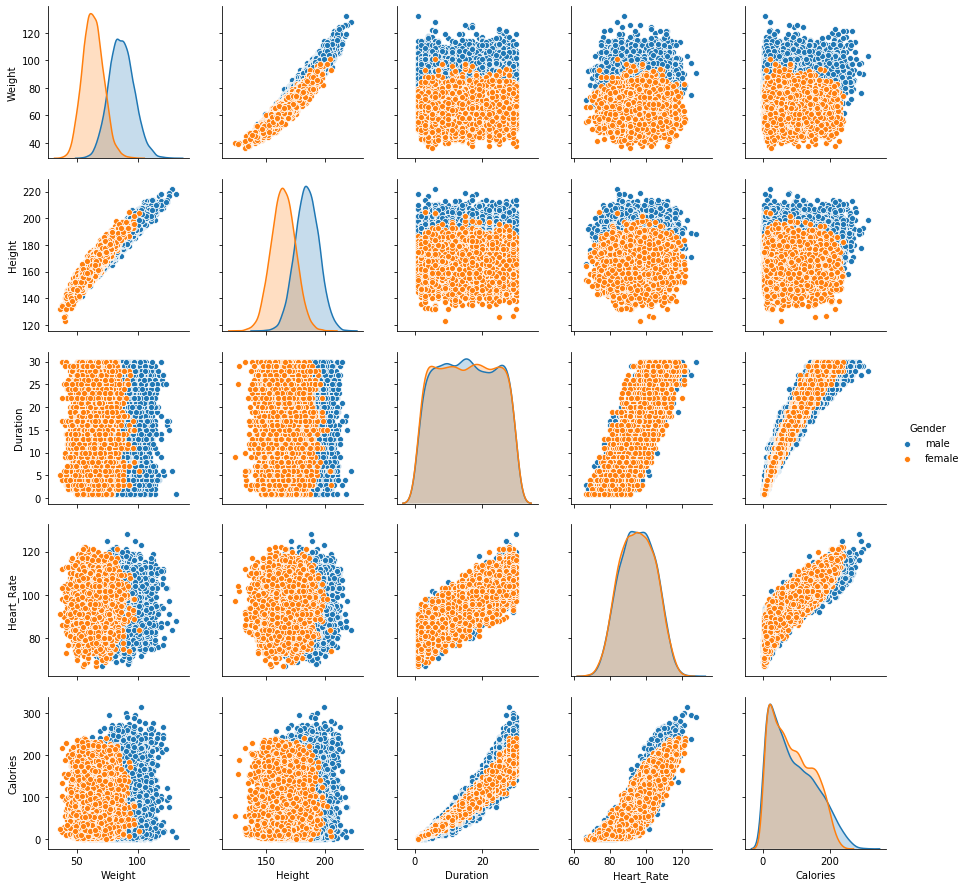

In [55]:
sns.pairplot(calories_df[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

* As we can see from graphs above, there is not a specific correlation or relationship between most of the features in the dataset.For example,there is not a specific relationship between `Duration` and `Weight` or between `Duration` and `Hight`.This is because exercisers may have different exercise duration no matter of their `Weight` and `Height`.

* In some cases, a featrue has a low relationship with another feature, like `Duration` and `Heart_Rate`.Somehow(with low confident) we can say that the more time somebody exercises the more 'Heart Rate' per minute he/she will have.

* In some cases , two featrues have a high relationship(in compare to last two cases), like `Height` and `Weight`.

### Gender
Lets plot the count plot of each gender to see how many exercisers are male and how many of them are female.

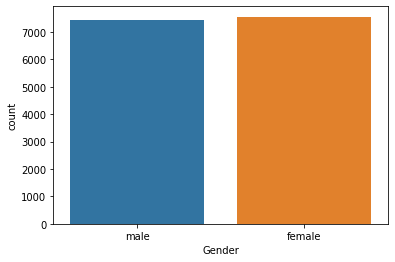

In [56]:
sns.countplot(x=calories_df['Gender'])

* As we can see, number of females are slightly higher than man but this distinction is not significant.we can say, in general, they are equal.


\
In this section, lets compare the exercise duration between males and females. 

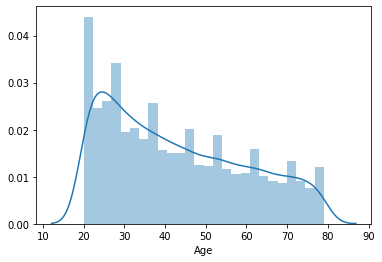

In [57]:
x=calories_df['Age']
sns.distplot(x)
plt.show()

The peak in exercise participation and calories burnt among individuals in their 20s and 30s suggests that younger adults are more actively engaged in physical activities compared to older age groups. This could be due to various factors such as higher energy levels, fewer physical limitations, and a greater emphasis on fitness and health among younger demographics.

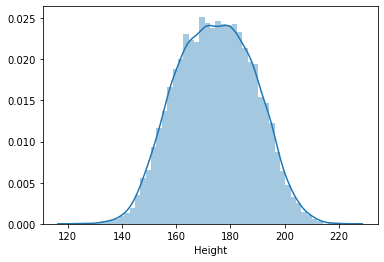

In [58]:
y=calories_df['Height']
sns.distplot(y)
plt.show()

 A symmetric distribution of heights suggests that there is relatively uniform representation across different height ranges in our dataset. This could indicate that the population from which the data is drawn is relatively homogenous in terms of height characteristics.

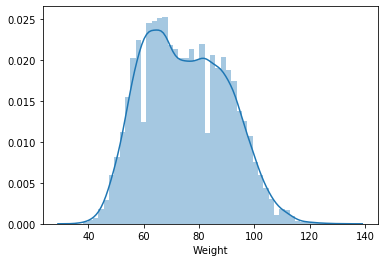

In [59]:
z=calories_df['Weight']
sns.distplot(z)
plt.show()

In [60]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
Gender        15000 non-null object
Age           15000 non-null int64
Height        15000 non-null float64
Weight        15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.7+ MB


In [61]:
corelation = calories_df.corr()

In [62]:
corelation

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


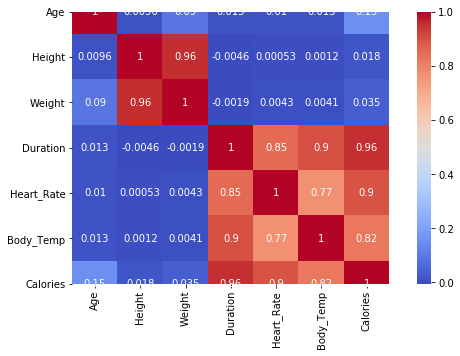

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(corelation,cbar=True,square=True,annot=True, cmap='coolwarm')

* This heatmap shows the correlation of both features in each cell.As we can see, many features have high correlation with another feature.One thing that has to be mentioned is that we have to drop useless features as many as possible.Because when we have many features the dimension of fearture space will be very large and when our model runs on this features it will be very slow.Because of that we have to drop some features.
* If two or more features have a high correlation with each other, we have to save one of them and drop the rest.In This way, we can improve model's efficiency.
* According to the heatmap, `Weight` and `Height` have a high correlation but we combined them and put them into the `BMI` column.So we can drop `Weight` and `Height` columns and save `BMI`.


In [64]:
calories_df['BMI'] = calories_df['Weight'] / (calories_df['Height'] / 100)**2 

In [65]:
calories_df = calories_df[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]


In [66]:
calories_df

,Gender,Age,BMI,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,26.038781,29.0,105.0,40.8,231.0
1,female,20,21.773842,14.0,94.0,40.3,66.0
2,male,69,24.655910,5.0,88.0,38.7,26.0
3,female,34,22.159109,13.0,100.0,40.5,71.0
4,female,27,24.456063,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,female,20,23.087868,11.0,92.0,40.4,45.0
14996,female,27,23.875115,6.0,85.0,39.2,23.0
14997,female,43,22.942130,16.0,90.0,40.1,75.0
14998,male,78,26.040968,2.0,84.0,38.3,11.0


In [67]:
# Map gender categories to numeric values
gender_map = {'male': 0, 'female': 1}
calories_df['Gender'] = calories_df['Gender'].map(gender_map)

In [68]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 7 columns):
Gender        15000 non-null int64
Age           15000 non-null int64
BMI           15000 non-null float64
Duration      15000 non-null float64
Heart_Rate    15000 non-null float64
Body_Temp     15000 non-null float64
Calories      15000 non-null float64
dtypes: float64(5), int64(2)
memory usage: 1.5 MB


# Splitting trainnig and testing

In [69]:
X= calories_df.drop('Calories',axis=1)
y = calories_df['Calories']

In [70]:
X.shape

(15000, 6)

In [71]:
y.shape

(15000,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Training Models

In [73]:
models = {
    'lr':LinearRegression(),
    "rfr":RandomForestRegressor(),
    'dtr':DecisionTreeRegressor(),
    'xg':XGBRFRegressor()
}

for name, mod in models.items():
    mod.fit(X_train,y_train)
    ypred = mod.predict(X_test)
    print(f"{name}  mse: {mean_squared_error(y_test,ypred)} r2 score: {r2_score(y_test,ypred)}")
    

lr  mse: 131.34396465187004 r2 score: 0.9665590256584304
rfr  mse: 15.659703333333333 r2 score: 0.996012944037782
dtr  mse: 32.17633333333333 r2 score: 0.9918077093206545
xg  mse: 60.952990696201816 r2 score: 0.9844809968747613


# selecting model

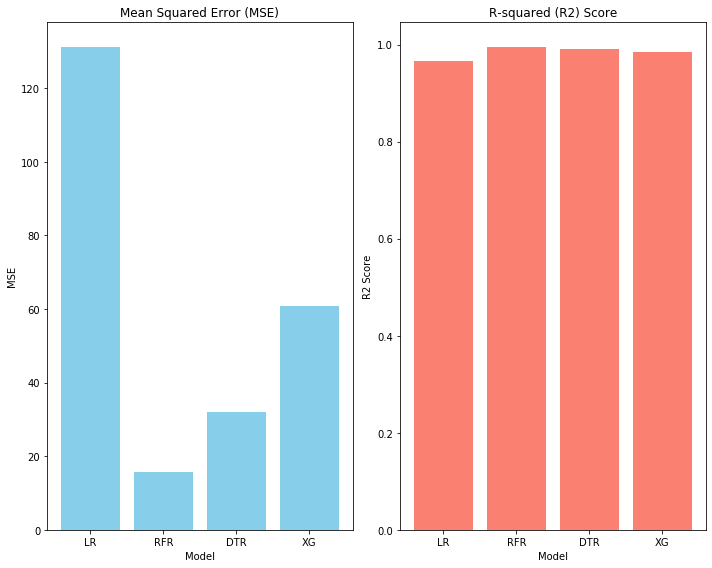

In [74]:


# Results
models = ['LR', 'RFR', 'DTR', 'XG']
mse_scores = [131.344, 15.597, 31.916, 60.953]
r2_scores = [0.967, 0.996, 0.992, 0.984]

# Plotting
plt.figure(figsize=(10, 8))

# Plotting MSE scores
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plotting R2 scores
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='salmon')
plt.title('R-squared (R2) Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()



Among these models, the Random Forest Regressor (RFR) has the lowest MSE and highest R2 score, indicating better performance in predicting the target variable compared to the other models. Therefore, based on these evaluation metrics, the Random Forest Regressor would be the preferred choice for your task.






In [75]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Predictive System

In [76]:
X_train

,Gender,Age,BMI,Duration,Heart_Rate,Body_Temp
1154,1,38,23.458562,3.0,85.0,38.5
9804,0,30,25.507493,9.0,91.0,39.6
7919,1,78,23.849777,7.0,84.0,39.4
4854,0,50,26.332889,29.0,111.0,40.8
5947,1,32,22.309356,29.0,105.0,40.8
...,...,...,...,...,...,...
11798,1,49,22.408787,12.0,98.0,39.9
13896,1,67,22.942130,23.0,101.0,40.4
6637,1,25,22.948116,20.0,100.0,40.4
2575,1,36,22.948116,28.0,108.0,40.8


In [77]:
def pred(Gender,Age,BMI,Duration,Heart_Rate,Body_Temp):
    features = np.array([[Gender,Age,BMI,Duration,Heart_Rate,Body_Temp]])
    prediction = model.predict(features).reshape(1,-1)
    return prediction[0]

In [78]:
Gender = 1
Age = 36
BMI=22.94
Duration = 28.0
Heart_Rate = 108.0
Body_Temp = 40.0


result = pred(Gender,Age,BMI,Duration,Heart_Rate,Body_Temp)
print("you consumed this much calories",result)

you consumed this much calories [181.8]
